# Scikit-Learn Example Using Stata's auto2.dta

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load example data provided by Stata
exfile = pd.read_stata('http://www.stata-press.com/data/r15/auto2.dta')

In [3]:
# Use pd.set_option to conserve display space.
pd.set_option('display.max_rows', 8)

# Generate a dummy variable for later use.
# For Stata users, equivalent code: gen fgn = (foreign == "Foreign")
exfile['fgn'] = np.where(exfile['foreign']=='Foreign', 1, 0)

# Check results.
exfile

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,fgn
0,AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic,0
1,AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic,0
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,0
3,Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,VW Diesel,5397,41,Excellent,3.0,15,2040,155,35,90,3.78,Foreign,1
71,VW Rabbit,4697,25,Good,3.0,15,1930,155,35,89,3.78,Foreign,1
72,VW Scirocco,6850,25,Good,2.0,16,1990,156,36,97,3.78,Foreign,1
73,Volvo 260,11995,17,Excellent,2.5,14,3170,193,37,163,2.98,Foreign,1


In [4]:
# Feature Matrix
X = exfile[['price','mpg','length']]
# Target Matrix
y = exfile[['fgn']]

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

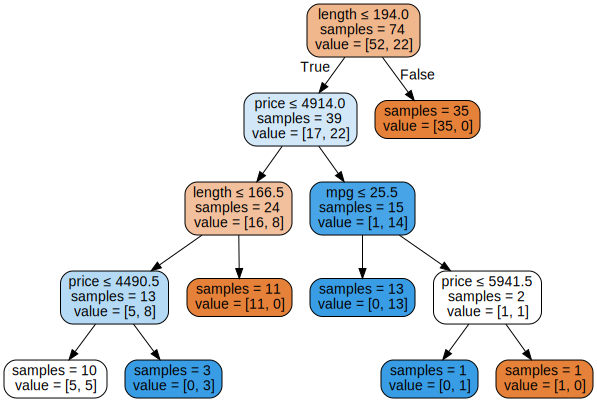

In [6]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image 
dot_data = export_graphviz(clf, out_file=None,
                          impurity=False,
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          feature_names=list(X))
graphviz.Source(dot_data)

In [7]:
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, log_loss)

print(f'training accuracy = {accuracy_score(y, clf.predict(X))}')
print(f'training precision = {precision_score(y, clf.predict(X))}')
print(f'training recall = {recall_score(y, clf.predict(X))}')
print(f'training f1 score = {f1_score(y, clf.predict(X))}')
print(f'training log loss = {log_loss(y, clf.predict(X))}')

training accuracy = 0.9324324324324325
training precision = 1.0
training recall = 0.7727272727272727
training f1 score = 0.8717948717948718
training log loss = 2.3337011077642362


In [8]:
from sklearn.metrics import confusion_matrix

# Add variable that indicates prediction result.
exfile['fgn_pred'] = clf.predict(X)

In [9]:
pd.set_option('display.max_rows', 74)

# Display opservations with incorrect predictions.
exfile[exfile['fgn'] != exfile['fgn_pred']]

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,fgn,fgn_pred
59,Fiat Strada,4296,21,Average,2.5,16,2130,161,36,105,3.37,Foreign,1,0
62,Mazda GLC,3995,30,Good,3.5,11,1980,154,33,86,3.73,Foreign,1,0
64,Renault Le Car,3895,26,Average,3.0,10,1830,142,34,79,3.72,Foreign,1,0
65,Subaru,3798,35,Excellent,2.5,11,2050,164,36,97,3.81,Foreign,1,0
67,Toyota Corolla,3748,31,Excellent,3.0,9,2200,165,35,97,3.21,Foreign,1,0
